# Algorithmic Trading
## Introduction
Technology has become an asset in finance: financial institutions are now evolving to technology companies rather than just staying occupied with just the financial aspect: besides the fact that technology brings about innovation the speeds and can help to gain a competitive advantage, the speed and frequency of financial transactions, together with the large data volumes, makes that financial institutions’ attention for technology has increased over the years and that technology has indeed become a main enabler in finance.

This notebook introduces how to implement some algorithmic trading strategies in Python.

### Stocks & Trading
When a company wants to grow and undertake new projects or expand, it can issue stocks to raise capital. A stock represents a share in the ownership of a company and is issued in return for money. Stocks are bought and sold: buyers and sellers trade existing, previously issued shares. The price at which stocks are sold can move independent of the company’s success: the prices instead reflect supply and demand. This means that, whenever a stock is considered as ‘desirable’, due to a success, popularity, … the stock price will go up.

Note that stocks are not exactly the same as bonds, which is when companies raise money through borrowing, either as a loan from a bank or by issuing debt.

As you just read, buying and selling or trading is essential when you’re talking about stocks, but certainly not limited to it: trading is the act of buying or selling an asset, which could be financial security, like stock, a bond or a tangible product, such as gold or oil.

Stock trading is then the process of the cash that is paid for the stocks is converted into a share in the ownership of a company, which can be converted back to cash by selling, and this all hopefully with a profit. Now, to achieve a profitable return, you either go long or short in markets: you either by shares thinking that the stock price will go up to sell at a higher price in the future, or you sell your stock, expecting that you can buy it back at a lower price and realize a profit. When you follow a fixed plan to go long or short in markets, you have a trading strategy.

Developing a trading strategy is something that goes through a couple of phases, just like when you, for example, build machine learning models: you formulate a strategy and specify it in a form that you can test on your computer, you do some preliminary testing or backtesting, you optimize your strategy and lastly, you evaluate the performance and robustness of your strategy.

Trading strategies are usually verified by backtesting: you reconstruct, with historical data, trades that would have occurred in the past using the rules that are defined with the strategy that you have developed. This way, you can get an idea of the effectiveness of your strategy and you can use it as a starting point to optimize and improve your strategy before applying it to real markets. Of course, this all relies heavily on the underlying theory or belief that any strategy that has worked out well in the past will likely also work out well in the future, and, that any strategy that has performed poorly in the past will likely also do badly in the future.

### Time Series Data
A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals.

However, what you’ll often see when you’re working with stock data is not just two columns, that contain period and price observations, but most of the times, you’ll have five columns that contain observations of the period and the opening, high, low and closing prices of that period. This means that, if your period is set at a daily level, the observations for that day will give you an idea of the opening and closing price for that day and the extreme high and low price movement for a particular stock during that day.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Python Basics For Finance: Pandas

### Importing Data
The `pandas-datareader` package allows for reading in data from sources such as Google, Yahoo! Finance, World Bank,…

Here I am pulling apple stock from IEX, which provides historical prices for upto 5 years:

In [2]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

start=datetime.datetime(2014, 10, 1)
end=datetime.datetime(2018, 1, 1)

appl = pdr.DataReader('AAPL', 'iex',start,end)
appl.head()

5y


,open,high,low,close,volume
date,,,,,
2014-10-01,94.4247,94.5186,92.6506,93.1011,51491286
2014-10-02,93.1856,94.0774,92.0310,93.7770,47757828
2014-10-03,93.3452,94.0680,92.9697,93.5142,43469585
2014-10-06,93.8239,94.4810,93.3264,93.5142,37051182
2014-10-07,93.3358,93.9835,92.6787,92.6975,42094183


An alternative to `pandas_datareader` is Quandl:

In [3]:
import quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


### Working With Time Series Data
The data was read into a pandas dataframe, so all the normal functions are available

In [4]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [5]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

              Open   High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-11-01  81.100  81.38  78.36  79.16  21828300.0          0.0          1.0   
2006-11-02  78.915  79.32  78.50  78.98  16624400.0          0.0          1.0   
2006-11-03  79.360  79.53  77.79  78.29  15424600.0          0.0          1.0   
2006-11-06  78.950  80.06  78.43  79.71  15520600.0          0.0          1.0   
2006-11-07  80.450  81.00  80.13  80.51  18783300.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2006-11-01  10.422480  10.458464  10.070352   10.173163  152798100.0  
2006-11-02  10.141677  10.193726  10.088344   10.150031  116370800.0  
2006-11-03  10.198866  10.220713   9.997099   10.061356  107972200.0  
2006-11-06  10.146175  10.288826  10.079348   10.243846  108644200.0  
2006-1

In [6]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)

              Open    High     Low   Close      Volume  Ex-Dividend  \
Date                                                                  
2010-08-05  261.73  263.18  260.55  261.70  10324900.0          0.0   
2008-08-11  170.07  176.50  169.67  173.56  31832300.0          0.0   
2008-12-22   90.02   90.03   84.69   85.74  30169300.0          0.0   
2011-06-29  336.04  336.37  331.88  334.04  12590900.0          0.0   
2009-06-09  143.81  144.56  140.55  142.72  24177300.0          0.0   
2008-10-15  103.84  107.00   97.89   97.95  56577700.0          0.0   
2009-01-26   88.88   90.97   88.30   89.64  24722800.0          0.0   
2008-04-10  151.13  155.42  150.60  154.55  34134400.0          0.0   
2011-11-21  370.40  371.68  365.91  369.01  15999300.0          0.0   
2010-10-13  300.20  301.96  299.80  300.14  22503300.0          0.0   
2008-08-01  159.94  159.99  155.75  156.66  19451400.0          0.0   
2010-11-30  313.54  314.36  310.87  311.15  17923500.0          0.0   
2011-0

In [7]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

# Delete the new `diff` column
del aapl['diff']

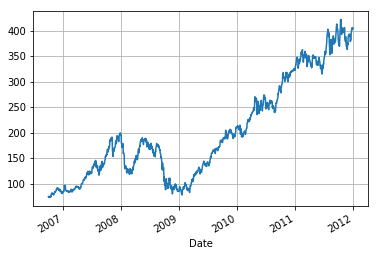

In [8]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

## Common Financial Analysis
In the rest of this section, I will explore returns, moving windows, volatility calculation and Ordinary Least-Squares Regression (OLS).

### Returns
The simple daily percentage doesn't take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading.

Note I am calculating te log returns to get a better insight into the growth of the returns over the timeperiod.

In [9]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj. Close']]

# Daily retuns 
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

In [10]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values in the beginning of the resulting DataFrame.

In [11]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
2006-10-09    0.005524
2006-10-10   -0.010988
2006-10-11   -0.007858
2006-10-12    0.027721
2006-10-13   -0.003189
2006-10-16    0.005065
2006-10-17   -0.014721
2006-10-18    0.003231
2006-10-19    0.059842
2006-10-20    0.012153
2006-10-23    0.018887
2006-10-24   -0.005033
2006-10-25    0.007773
2006-10-26    0.006244
2006-10-27   -0.021657
2006-10-30    0.000124
2006-10-31    0.008207
2006-11-01   -0.023680
2006-11-02   -0.002274
2006-11-03   -0.008736
2006-11-06    0.018138
2006-11-07    0.010036
2006-11-08    0.024096
2006-11-09    0.010794
2006-11-10   -0.002640
...                ...
2011-11-17   -0.019128
2011-11-18   -0.006545
2011-11-21   -0.015816
2011-11-22    0.020325
2011-11-23   -0.025285
2011-11-25   -0.009319
2011-11-28    0.034519
2011-11-29   -0.007763
2011-11-30    0.024116
2011-12-01    0.014992
2011-12-02 

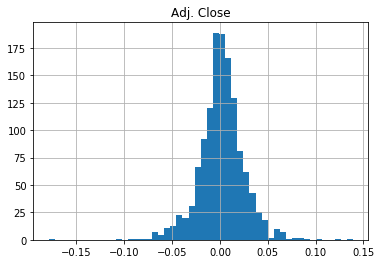

        Adj. Close
count  1322.000000
mean      0.001567
std       0.023994
min      -0.179195
25%      -0.010630
50%       0.001680
75%       0.014306
max       0.139050


In [12]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

The distribution looks very symmetrical and normally distributed: the daily changes centre approximately around 0.0. Using `.describe()` we can see that it is actually centred arounf 0.001567 and the standard deviation is 0.024.

The **cumulative daily rated of return** is useful to determine the value of an investment at regular intervals. The daily rate of return can be calculated by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:

In [13]:
#ncumulatice daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
2006-10-09    0.996928
2006-10-10    0.985974
2006-10-11    0.978226
2006-10-12    1.005343
2006-10-13    1.002137
2006-10-16    1.007213
2006-10-17    0.992386
2006-10-18    0.995592
2006-10-19    1.055170
2006-10-20    1.067994
2006-10-23    1.088165
2006-10-24    1.082688
2006-10-25    1.091103
2006-10-26    1.097916
2006-10-27    1.074138
2006-10-30    1.074272
2006-10-31    1.083088
2006-11-01    1.057441
2006-11-02    1.055036
2006-11-03    1.045819
2006-11-06    1.064788
2006-11-07    1.075474
2006-11-08    1.101389
2006-11-09    1.113278
2006-11-10    1.110339
...                ...
2011-11-17    5.041544
2011-11-18    5.008549
2011-11-21    4.929335
2011-11-22    5.029522
2011-11-23    4.902351
2011-11-25    4.856666
2011-11-28    5.024312
2011-11-29    4.985306
2011-11-30    5.105530
2011-12-01    5.182073
2011-12-02 

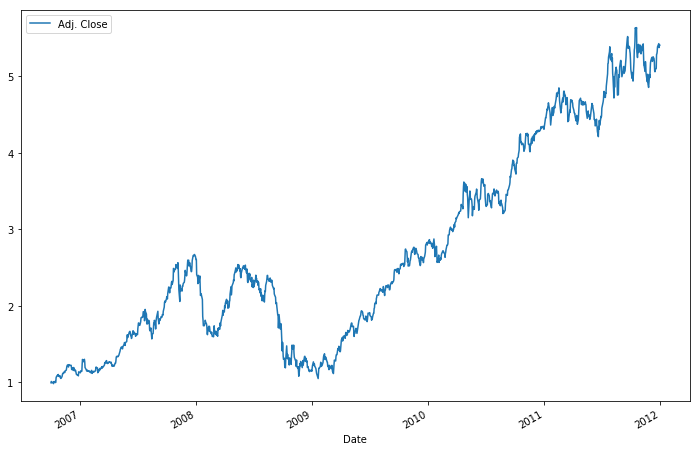

In [14]:
import matplotlib.pyplot as plt 

cum_daily_return.plot(figsize=(12,8))

plt.show()

In [15]:
# Resample the cumulative daily retunr to cumulaitve monthly return
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.031704
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
2007-03-31    1.210302
2007-04-30    1.251735
2007-05-31    1.453453
2007-06-30    1.625637
2007-07-31    1.818073
2007-08-31    1.734484
2007-09-30    1.897943
2007-10-31    2.295092
2007-11-30    2.333129
2007-12-31    2.544819
2008-01-31    2.142375
2008-02-29    1.671827
2008-03-31    1.747569
2008-04-30    2.113108
2008-05-31    2.468067
2008-06-30    2.384260
2008-07-31    2.240831
2008-08-31    2.285193
2008-09-30    1.886766
2008-10-31    1.322521
2008-11-30    1.254883
2008-12-31    1.222864
2009-01-31    1.185880
2009-02-28    1.256669
2009-03-31    1.302697
...                ...
2009-07-31    1.994629
2009-08-31    2.221219
2009-09-30    2.374922
2009-10-31    2.575896
2009-11-30    2.675928
2009-12-31    2.657690
2010-01-31    2.774723
2010-02-28    2.655557
2010-03-31    2.984379
2010-04-30    3.354910
2010-05-31 

### Gather More Companies Data
This will be done by writing a function that takes the symbol of the stock, start and end date. The nest function `data()` the takes the company symbol to get the data from the start date to the end date and returns it so that the `get()` function can continue.

In [16]:
import quandl

def get(tickers, startdate, enddate):
    def data(ticker):
        return (quandl.get(ticker, start_date=startdate, end_date=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
tickers = ['WIKI/AAPL']
#tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.sample(20)

Open    High       Low     Close      Volume  \
Ticker    Date                                                          
WIKI/AAPL 2007-06-08  125.825  125.83  122.2900  124.4900  44345800.0   
          2010-06-16  261.100  267.75  260.6302  267.2500  27988500.0   
          2008-07-15  172.300  173.74  166.3900  169.6400  37144400.0   
          2007-07-24  138.880  141.00  134.1500  134.8899  64117600.0   
          2010-12-22  324.360  325.72  323.5500  325.1600   9497200.0   
          2011-03-29  347.660  350.96  346.0600  350.9600  12603600.0   
          2011-10-24  396.180  406.50  395.4000  405.7700  17933500.0   
          2006-12-27   78.150   82.00   76.7700   81.5200  69134100.0   
          2009-05-21  125.150  126.78  122.8900  124.1800  14569500.0   
          2011-11-02  400.090  400.44  395.1100  397.4100  11691100.0   
          2007-05-15  109.570  110.20  106.4800  107.5200  34089800.0   
          2010-03-04  209.280  210.92  208.6300  210.7100  13072900.0   
          2011-03-11  345.330  352.32  345.0000  351.9900  16824300.0   
          2007-08-30  132.670  138.25  132.3000  136.2500  51270800.0   
          2008-07-16  170.080  172.93  168.6000  172.8100  26706800.0   
          2009-11-25  205.400  205.65  203.7600  204.1900  10230500.0   
          2009-05-29  135.390  135.90  133.8500  135.8100  16304800.0   
          2009-07-10  136.340  138.97  136.3200  138.5200  15902700.0   
          2008-09-30  108.250  115.00  106.3000  113.6600  58095800.0   
          2009-11-17  206.080  207.44  205.0000  207.0000  14161200.0   

                      Ex-Dividend  Split Ratio  Adj. Open  Adj. High  \
Ticker    Date                                                         
WIKI/AAPL 2007-06-08          0.0          1.0  16.170266  16.170909   
          2010-06-16          0.0          1.0  33.554989  34.409607   
          2008-07-15          0.0          1.0  22.142951  22.328012   
          2007-07-24          0.0          1.0  17.848016  18.120465   
          2010-12-22          0.0          1.0  41.684781  41.859560   
          2011-03-29          0.0          1.0  44.679156  45.103252   
          2011-10-24          0.0          1.0  50.914652  52.240916   
          2006-12-27          0.0          1.0  10.043364  10.538143   
          2009-05-21          0.0          1.0  16.083519  16.292997   
          2011-11-02          0.0          1.0  51.417141  51.462121   
          2007-05-15          0.0          1.0  14.081272  14.162236   
          2010-03-04          0.0          1.0  26.895397  27.106160   
          2011-03-11          0.0          1.0  44.379718  45.278031   
          2007-08-30          0.0          1.0  17.049944  17.767052   
          2008-07-16          0.0          1.0  21.857651  22.223915   
          2009-11-25          0.0          1.0  26.396763  26.428891   
          2009-05-29          0.0          1.0  17.399502  17.465044   
          2009-07-10          0.0          1.0  17.521590  17.859582   
          2008-09-30          0.0          1.0  13.911634  14.779103   
          2009-11-17          0.0          1.0  26.484152  26.658931   

                       Adj. Low  Adj. Close  Adj. Volume  
Ticker    Date                                            
WIKI/AAPL 2007-06-08  15.715969   15.998700  310420600.0  
          2010-06-16  33.494613   34.345350  195919500.0  
          2008-07-15  21.383434   21.801104  260010800.0  
          2007-07-24  17.240145   17.335232  448823200.0  
          2010-12-22  41.580685   41.787592   66480400.0  
          2011-03-29  44.473533   45.103252   88225200.0  
          2011-10-24  50.814411   52.147100  125534500.0  
          2006-12-27   9.866015   10.476456  483938700.0  
          2009-05-21  15.793078   15.958861  101986500.0  
          2011-11-02  50.777142   51.072724   81837700.0  
          2007-05-15  13.684164   13.817819  238628600.0  
          2010-03-04  26.811863   27.079172   91510300.0  
       

The function above only works for premium subscribers to quandl, as free users are not able to make concurrent calls. Therefore a modified function is below.

In [18]:
# import quandl
def data(ticker, startdate, enddate):
    return (quandl.get(ticker, start_date=startdate, end_date=enddate))


def get(tickers, startdate, enddate):
    datas = []
    for ticker in tickers:
        data = data(ticker, startdate, enddate)
        datas.append(data) 
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['WIKI/AAPL', 'WIKI/MSFT', 'WIKI/IBM', 'WIKI/GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head(5)

Open    High    Low  Close      Volume  Ex-Dividend  \
Ticker    Date                                                               
WIKI/AAPL 2006-10-02  75.10  75.870  74.30  74.86  25451400.0          0.0   
          2006-10-03  74.45  74.950  73.19  74.07  28239600.0          0.0   
          2006-10-04  74.10  75.462  73.16  75.38  29610100.0          0.0   
          2006-10-05  74.53  76.160  74.13  74.83  24424400.0          0.0   
          2006-10-06  74.42  75.040  73.81  74.22  16677100.0          0.0   

                      Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Ticker    Date                                                                  
WIKI/AAPL 2006-10-02          1.0   9.651397   9.750352  9.548586    9.620553   
          2006-10-03          1.0   9.567863   9.632120  9.405935    9.519027   
          2006-10-04          1.0   9.522883   9.697919  9.402080    9.687381   
          2006-10-05          1.0   9.578144   9.787621  9.526738    9.616698   
          2006-10-06          1.0   9.564007   9.643686  9.485614    9.538304   

                      Adj. Volume  
Ticker    Date                     
WIKI/AAPL 2006-10-02  178159800.0  
          2006-10-03  197677200.0  
          2006-10-04  207270700.0  
          2006-10-05  170970800.0  
          2006-10-06  116739700.0

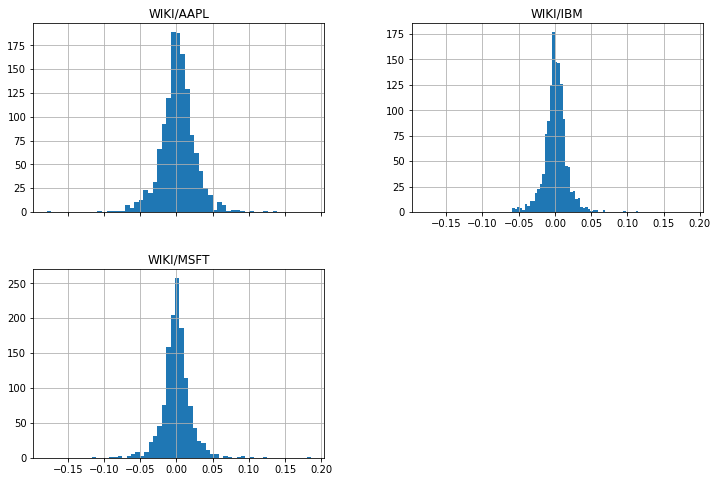

In [23]:
import matplotlib.pyplot as plt

# Isolate the `Adj. Close` values and trasnform the dataframe
daily_close_px = all_data[['Adj. Close']].reset_index().pivot('Date', 
                                                              'Ticker',
                                                              'Adj. Close')

# Calc the daily percentage change fro ` daily_close_px`
daily_pct_change = daily_close_px.pct_change()

daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()

A useful plot is the scatter matrix. This can be done easily by using the `pandas` library and the `scatter_matrix()` function. As arguments, I am passinf the `daily_pct_change` and as a diagonal, I am setting that I want to have a Kernel Density Estimate (KDE) plot. The Kernel Density Estimate plot estimates the probability density functionn of a randomb

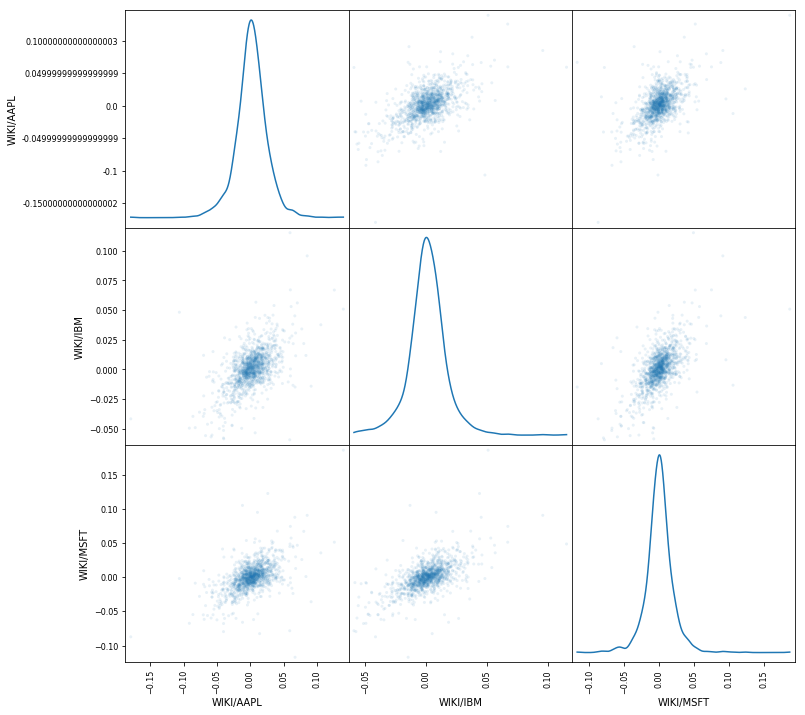

In [26]:
import matplotlib.pyplot as plt

# plot a scatter matrix with the `daily_pct_change` data
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, 
                           figsize=(12,12))

plt.show()

### Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval.

Pandas offers a lot of functions to calculate moving windows, such as `rolling_mean()`, `rolling_std()`,...

However, these are soon to be depreciated, so instead a combination of the functions `rolling()` with `mean()` or `std()`.

But what does a moving window exactly mean?

The exact meaning depends on the statistic that you're applying to the data. For example, a rolling mean smoothes out short-term fluctuations and hightlights longer-term trends in the data.

In [33]:
adj_close_px = aapl['Adj. Close']

moving_avg = adj_close_px.rolling(window=40).mean()

print(moving_avg[-10:])

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64


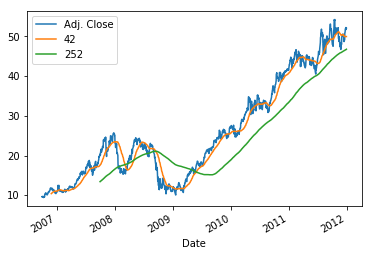

In [35]:
import matplotlib.pyplot as plt

# short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=42).mean()

# long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# plot the adjusted closing price, the short and log windows of rolling
# means
aapl[['Adj. Close', '42', '252']].plot()

# show plot
plt.show()

### Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock's volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

The moving historical standard deviation of the log returns - i.e. the moving historical volatility-might be more of interest: 

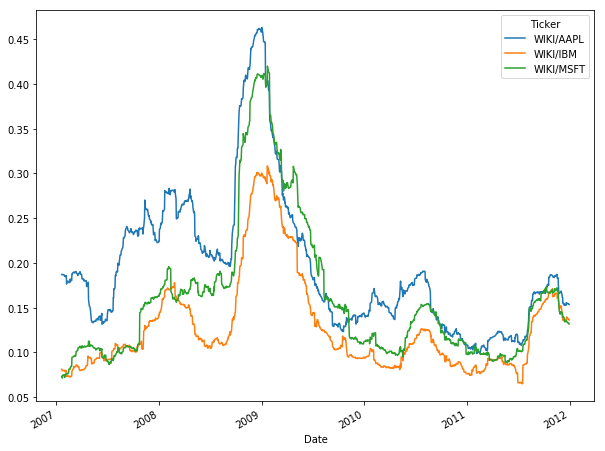

In [36]:
import matplotlib.pyplot as plt

# define the minimum number of periods to consider
min_periods = 75

# calculate volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(10,8))

plt.show()

The volatilty is calculated by taking a rolling window standard deviation on the percentagr change in a stock. 

Note that the size of the window can anf will change the overall result: if you take the window and make `min_periods` larger, your result will become less representative. If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

Considering all of this, you see that it's definitely a skill to get the right window size based upon the data sampling frequency.

### Ordinary Least-Squares Regression (OLS)
After all of these calculations, I want to perform a more statistical analysis of the financial data, with more traditional regresssion analysis, such as Ordinary Least-Squares Regression (OLS).

To do this, I am going to . ake use of the `statsmodels` library, which not only provides not only the ability to estimate statistical models but also to conduct statistical tests and perform data exploration.

In [ ]:
import statsmodels.api as sm
from pandas.core import datetools

# isolate the adjusted closing price
all_adj_close = all_data[['Adj. Close']]

# calculate the returns
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# isolate the aapl returns
aapl_returns = all_returns.iloc[all_returns.index.get_levels('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevle('Ticker')